References
* https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

Count Vectorizer
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [1]:
import pandas as pd

In [2]:
datafilepath = "D:\Victoria\EMSE\p2\EMSE_DevInt\python\data\data_processed\processed_data.csv"

In [3]:
# read data from the file and return the whole csv and the series of procesed data
def read_data(filepath):
    data = pd.read_csv(filepath)
    processed_data = data['processed_title_and_text']
    return data, processed_data

In [4]:
data, processed_data = read_data(datafilepath)

## Visualize Word Cloud

In [5]:
from wordcloud import WordCloud

In [6]:
def draw_word_Cloud(processed_data):
    long_string = ' '.join(list(processed_data.values))
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud.to_image()

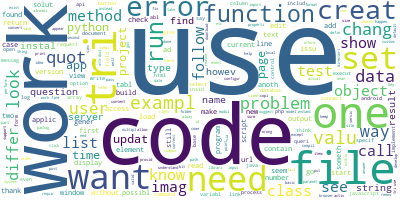

In [7]:
draw_word_Cloud(processed_data)

In [8]:
# create a count vectorizer
def create_count_vectorizer(processed_data):
    # Create a count vectorizer
    count_vectorizer = CountVectorizer()
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(processed_data)
    
    return count_vectorizer, count_data

## Visualized top words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
# plot the most common n words, default n = 10 given the process data
def plot_most_common_words(process_data, n = 10):
    
    # Create a count vectorizer
    count_vectorizer, count_data = create_count_vectorizer(processed_data)
    
    # Visualise the 10 most common words
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=str(n)+' most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

d:\victoria\emse\p2\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


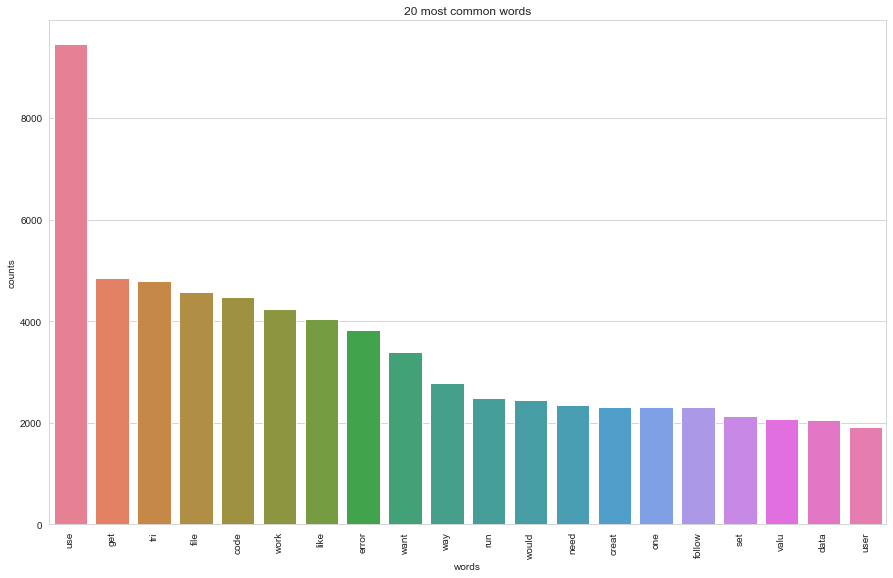

In [11]:
# Visualise the 20 most common words
plot_most_common_words(processed_data, n = 20)

## LDA

In [12]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [25]:
# Print the topics found by the LDA model
def print_topics(model, count_vectorizer, n_top_words, _print):
    words = count_vectorizer.get_feature_names()
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        if _print:
            print("\nTopic #%d:" % topic_idx)
            print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        topics.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topics

In [29]:
# Create and fit the LDA model
def create_topics(processed_data, number_topics = 5, number_words=10, _print=True):
    # Create a count vectorizer
    count_vectorizer, count_data = create_count_vectorizer(processed_data)
    
    lda = LDA(n_components=number_topics, n_jobs=-1)
    lda.fit(count_data)
    
    topics = print_topics(lda, count_vectorizer, number_words, _print)
        
    return lda, topics, count_vectorizer

In [31]:
number_topics = 5
number_words=10
lda, topics, count_vectorizer = create_topics(processed_data, number_topics = number_topics, number_words=number_words, _print=False)

In [32]:
topics

[['use',
  'imag',
  'work',
  'code',
  'tri',
  'button',
  'want',
  'click',
  'view',
  'form'],
 ['file',
  'use',
  'get',
  'code',
  'tri',
  'work',
  'error',
  'like',
  'project',
  'quot'],
 ['use',
  'error',
  'run',
  'server',
  'tri',
  'get',
  'app',
  'instal',
  'connect',
  'user'],
 ['use',
  'valu',
  'get',
  'like',
  'tabl',
  'string',
  'array',
  'object',
  'data',
  'column'],
 ['use',
  'time',
  'like',
  'code',
  'would',
  'way',
  'function',
  'want',
  'work',
  'need']]